In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("penguins_lter.csv")
df.sample(10)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
61,PAL0809,62,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N27A2,Yes,11/13/08,41.3,21.1,195.0,4400.0,MALE,8.74802,-26.37809,NaN
294,PAL0809,75,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N56A1,Yes,11/6/08,46.4,15.0,216.0,4700.0,FEMALE,8.47938,-26.95470,NaN
238,PAL0708,19,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N40A1,Yes,11/27/07,46.2,14.5,209.0,4800.0,FEMALE,7.84057,-25.37899,NaN
110,PAL0910,111,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N58A1,Yes,11/12/09,38.1,16.5,198.0,3825.0,FEMALE,8.43951,-26.57563,NaN
246,PAL0708,27,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N46A1,Yes,11/29/07,44.5,14.3,216.0,4100.0,NaN,7.96621,-25.69327,NaN
31,PAL0708,32,Adelie Penguin (Pygoscelis adeliae),Anvers,Dream,"Adult, 1 Egg Stage",N21A2,Yes,11/9/07,37.2,18.1,178.0,3900.0,MALE,9.72764,-25.01020,NaN
254,PAL0809,35,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N2A1,Yes,11/13/08,49.1,14.8,220.0,5150.0,FEMALE,7.89744,-26.63405,NaN
15,PAL0708,16,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N8A2,Yes,11/16/07,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Not enough blood for isotopes.
322,PAL0910,103,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N23A1,Yes,11/18/09,47.2,15.5,215.0,4975.0,FEMALE,8.30817,-26.21651,NaN
118,PAL0910,119,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N64A1,Yes,11/22/09,35.7,17.0,189.0,3350.0,FEMALE,8.96436,-23.90309,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [6]:
df.shape

(344, 17)

In [7]:
med1 = df["Culmen Length (mm)"].median()
df["Culmen Length (mm)"].replace(np.nan, med1, inplace = True)

med2 = df["Culmen Depth (mm)"].median()
df["Culmen Depth (mm)"].replace(np.nan, med2, inplace = True)

med3 = df["Flipper Length (mm)"].median()
df["Flipper Length (mm)"].replace(np.nan, med3, inplace = True)

med4 = df["Body Mass (g)"].median()
df["Body Mass (g)"].replace(np.nan, med4, inplace = True)

med5 = df["Delta 15 N (o/oo)"].median()
df["Delta 15 N (o/oo)"].replace(np.nan, med5, inplace = True)

med6 = df["Delta 13 C (o/oo)"].median()
df["Delta 13 C (o/oo)"].replace(np.nan, med6, inplace = True)

mod1 = df["Sex"].mode().values[0]
df["Sex"].replace(np.nan, mod1, inplace = True)

df = df.drop("Comments", axis = 1)

df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

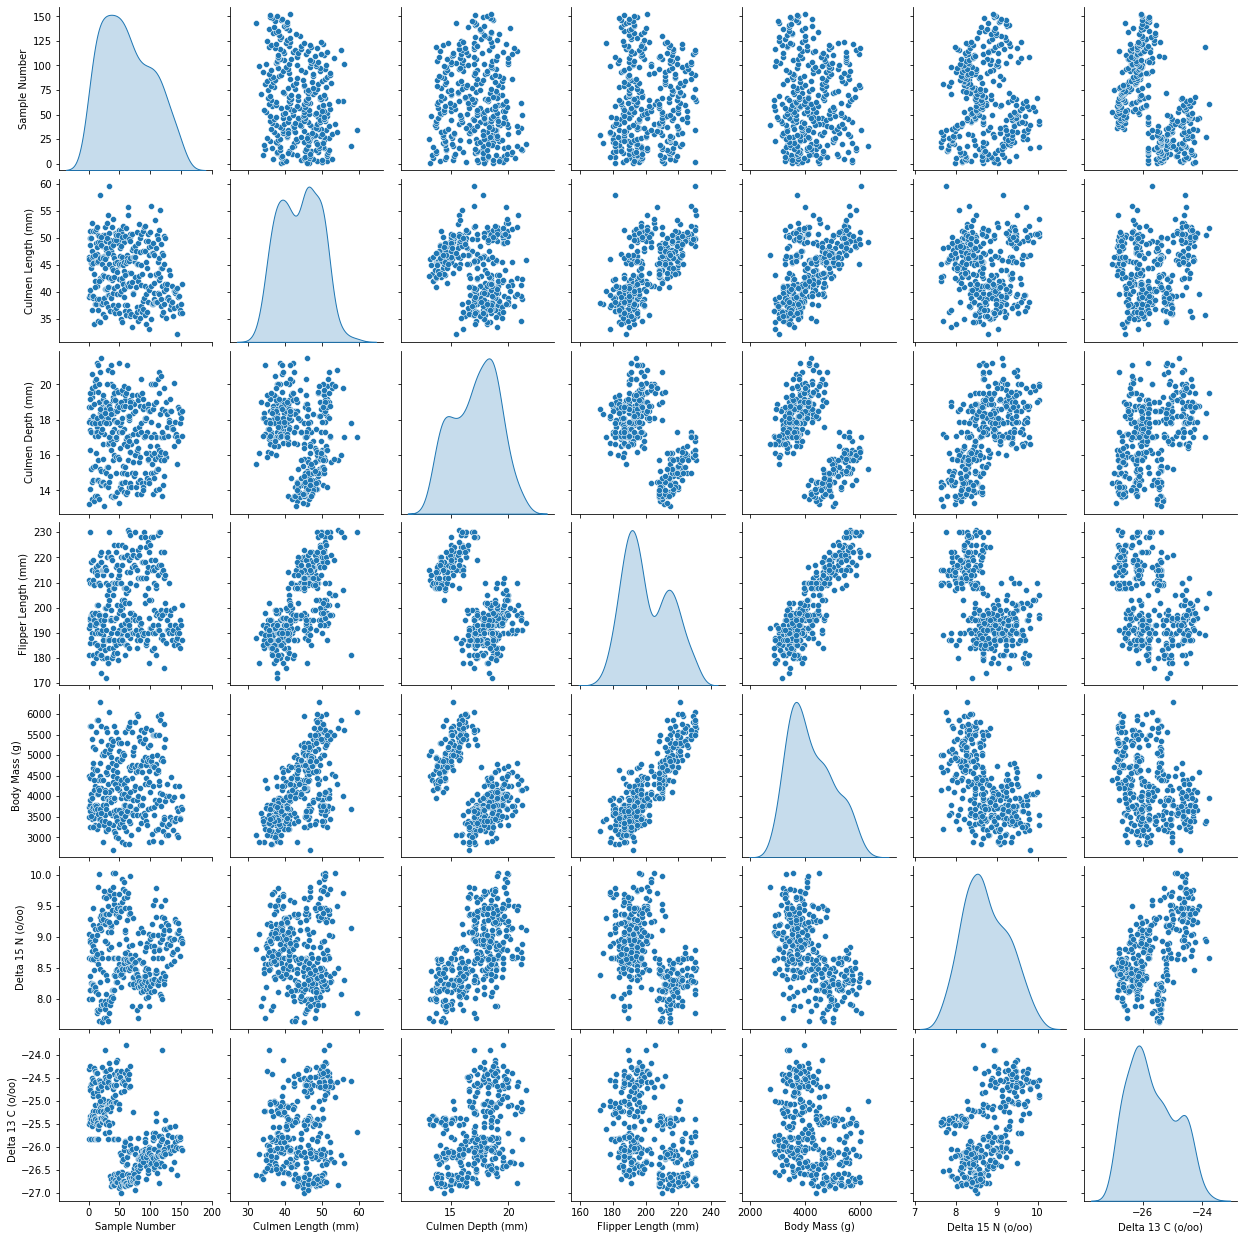

In [8]:
sns.pairplot(df,diag_kind = "kde")

In [9]:
dup = df.duplicated()
dup.sum()

0

In [10]:
correlation = df.corr()

<AxesSubplot:>

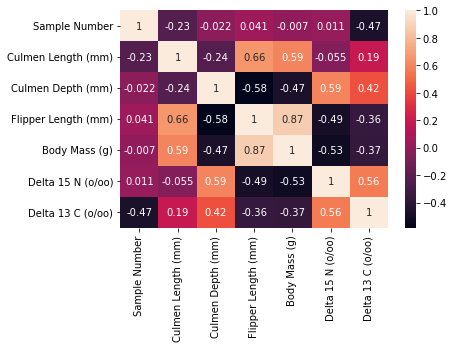

In [12]:
sns.heatmap(correlation , annot = True)